In [106]:
# -*- coding: utf-8 -*-
import tensorflow as tf
import numpy as np
import sys

# The paths of RNNCell or rnn functions are too long.
from tensorflow.contrib.legacy_seq2seq.python.ops import *
from tensorflow.contrib.rnn.python.ops.core_rnn_cell import *
from tensorflow.contrib.legacy_seq2seq.python.ops.seq2seq import *

from konlpy.tag import Twitter
mecab = Twitter()


def get_normalized_data(sentence):
    original_sentence = mecab.pos(sentence)
    inputData = []
    for w, t in original_sentence:
        if t in ['Number']:
            w = '0'
        if t not in ['Punctuation']:
            inputData.append(w)
    return ''.join(inputData)


def get_training_data(sentence):
    original_sentence = mecab.pos(sentence)
    inputData = []
    for w, t in original_sentence:
        if t in ['Number']:
            w = '0'
        if t not in ['Josa']:
            inputData.append(w)
    return ''.join(inputData)

# input_data = []
# for i in text_data:
#     input_data.append(get_training_data(i))

text_read_input =[]
f = open("./text2.txt", 'r', encoding='utf-8')
while True:
    line = f.readline()
    if line == '\n':
        del line
    else:
        text_read_input.append(line)
        if not line: break
f.close()

text_read_input_data = []
for i in text_read_input:
    text_read_input_data.append(get_normalized_data(i))

input_data = []
for i in text_read_input:
    input_data.append(get_training_data(i))

# train_data = [[x] + [y] for x,y in zip(input_data, text_data)]
train_data = [[x] + [y] for x,y in zip(input_data, text_read_input_data)]


char_array = []
all_char = ''
for text in train_data:
    all_char = all_char + ''.join(text)
char_array = list(set(all_char)) + ['[',']','P']
print(train_data)

max_input_text = max(len(s[0]) for s in train_data)
max_output_text = max(len(s[1]) for s in train_data)
# enumerate 방법 사용 index : value 정렬
num_dic = {n: i for i, n in enumerate(char_array)}

dic_len = len(num_dic)

print ("Char List : " + str(num_dic))
print ("Char Size : " + str(dic_len))

index_in_epoch = 0

def make_train_data(train_data, batch_size=16, isTrain=True):
    input_batch = []
    output_batch = []
    target_batch = []

    if isTrain:
        global index_in_epoch
        start = index_in_epoch
        if index_in_epoch + batch_size < len(train_data) -1:
            index_in_epoch = index_in_epoch + batch_size
        else:
            index_in_epoch = 0
        batch_set = train_data[start:start+batch_size]
    else:
        batch_set = train_data

    for seq in batch_set:
        # 인코더 셀의 입력값. 입력단어의 글자들을 한글자씩 떼어 배열로 만든다.
        input = [num_dic[n] for n in seq[0]+'P' * (max_input_text - len(seq[0]))]
        # 디코더 셀의 입력값. 시작을 나타내는 [ 심볼을 맨 앞에 붙여준다.
        output = [num_dic[n] for n in ('[' + seq[1] + 'P' * (max_output_text - len(seq[1])))]
        # 학습을 위해 비교할 디코더 셀의 출력값. 끝나는 것을 알려주기 위해 마지막에 ] 를 붙인다.
        target = [num_dic[n] for n in (seq[1] + 'P' * (max_output_text - len(seq[1])) + ']' )]
        input_batch.append(input)
        output_batch.append(output)
        target_batch.append(target)
    return input_batch, output_batch, target_batch


file_path = './model'
def model_file(file_path, flag):
    if(flag):
        import os
        saver = tf.train.Saver(tf.global_variables())

        if(not os.path.exists(file_path)):
            os.makedirs(file_path)
        saver.save(sess, ''.join(file_path + "/.model"))
        print("Model Saved")
    else:
        import shutil
        try:
            shutil.rmtree(file_path)
            print("Model Deleted")
        except OSError as e:
            if e.errno == 2:
                # 파일이나 디렉토리가 없음!
                print ('No such file or directory to remove')
                pass
            else:
                raise



[["영화관스파이더맨상영합?',", '영화관에서스파이더맨을상영합니까'], ["'몇장의티켓필요하십니까?',", '몇장의티켓이필요하십니까'], ["'영화표0장원합니다',", '영화표0장을원합니다'], ["'서울특별시이용가능합니다',", '서울특별시에서이용가능합니다'], ["'cgv성신여대입구이용가능합니다',", 'cgv성신여대입구에서이용가능합니다'], ["'0일원합니다',", '0일에원합니다'], ["'0시상영하는영화표필요합니다',", '0시에상영하는영화표가필요합니다'], ["'감사합니다'", '감사합니다'], ["'0시이용가능합니다.',", '0시에이용가능합니다'], ["'영화표0장원합니다!',", '영화표0장을원합니다'], ["'cgv수원이용가능합니다',", 'cgv수원에서이용가능합니다'], ["'안양이용가능합니다',", '안양에서이용가능합니다'], ["'0시이용가능합니다.',", '0시에이용가능합니다'], ["'0일인비저블게스트예매할수있습니까?',", '0일에인비저블게스트를예매할수있습니까'], ["'서울특별시영화보기원합니다.',", '서울특별시에서영화를보기원합니다'], ["'0시이용가능합니다.',", '0시에이용가능합니다'], ["'영화표0장원합니다',", '영화표0장을원합니다'], ["'몇시보고싶습니까?',", '몇시에보고싶습니까'], ["'0일지정하기원합니다.',", '0일에지정하기원합니다'], ["'어느영화관가능합니까?',", '어느영화관이가능합니까'], ["'어느영화관은평구인비저블게스트상영합?',", '어느영화관이은평구인비저블게스트상영합니까'], ["'0일이용가능합니다.',", '0일에이용가능합니다'], ["'0장예매할수있습니까?',", '0장을예매할수있습니까'], ["'예매도주실수있으세요?',", '예매를도와주실수있으세요'], ["'어떤도시원합니까?',", '어떤도시를원합니까'], ["'0시이용가능합니다.',", '0시에이용가능합니다'], ["'서울특별시상영하는영화표필요합니다.',", '서울특별시에서상영하는영화표가필요합니다'], ["'0일cgv범계0

Epoch: 0/30000 Iteration: 0 Train loss: 4.927
Epoch: 500/30000 Iteration: 500 Train loss: 1.391
Epoch: 1000/30000 Iteration: 1000 Train loss: 0.526
Epoch: 1500/30000 Iteration: 1500 Train loss: 0.550
Epoch: 2000/30000 Iteration: 2000 Train loss: 0.130
Epoch: 2500/30000 Iteration: 2500 Train loss: 0.124
Epoch: 3000/30000 Iteration: 3000 Train loss: 0.122
Epoch: 3500/30000 Iteration: 3500 Train loss: 0.120
Epoch: 4000/30000 Iteration: 4000 Train loss: 0.118
Epoch: 4500/30000 Iteration: 4500 Train loss: 0.120
Epoch: 5000/30000 Iteration: 5000 Train loss: 0.118
Epoch: 5500/30000 Iteration: 5500 Train loss: 0.367
Epoch: 6000/30000 Iteration: 6000 Train loss: 0.117
Epoch: 6500/30000 Iteration: 6500 Train loss: 0.121
Epoch: 7000/30000 Iteration: 7000 Train loss: 0.118
Epoch: 7500/30000 Iteration: 7500 Train loss: 0.117
Epoch: 8000/30000 Iteration: 8000 Train loss: 0.118
Epoch: 8500/30000 Iteration: 8500 Train loss: 0.117
Epoch: 9000/30000 Iteration: 9000 Train loss: 0.117
Epoch: 9500/30000 It

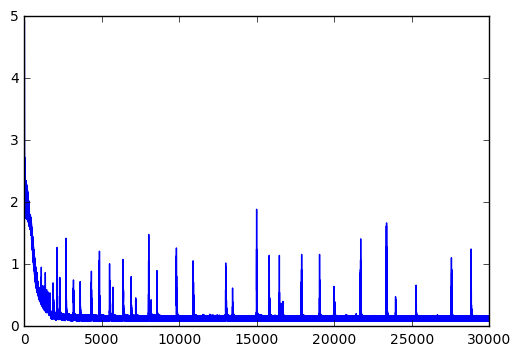

In [107]:
# 옵션 설정
learning_rate = 0.0005
n_hidden = 128
batch_size = 16
total_epoch = 30000
# one hot 위한 사이즈
n_class = n_input = dic_len

# 그래프 초기화
tf.reset_default_graph()
# Seq2Seq 모델은 인코더의 입력과 디코더의 입력의 형식이 같다.
enc_input = tf.placeholder(tf.int32, [None, max_input_text])
dec_input = tf.placeholder(tf.int32, [None, max_output_text+1])
targets = tf.placeholder(tf.int64, [None, None])


enc_inputs_t = tf.transpose(enc_input, [1,0])
dec_inputs_t = tf.transpose(dec_input, [1,0])
cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden)
# Attention Seq2Seq
with tf.variable_scope("embedding_attention_seq2seq"):
    # dec_outputs: [dec_sent_len+1 x batch_size x hidden_size]
    dec_outputs, last_state = embedding_attention_seq2seq(
        encoder_inputs=tf.unstack(enc_inputs_t),
        decoder_inputs=tf.unstack(dec_inputs_t),
        cell=cell,
        num_encoder_symbols=dic_len+1,
        num_decoder_symbols=dic_len+2,
        embedding_size=n_hidden,
        feed_previous=False)
outputs = tf.stack(dec_outputs)
model = tf.layers.dense(outputs, n_class, activation=None)

cost = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(
        logits=model, labels=targets))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

sess = tf.Session(config=tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth =True)))
sess.run(tf.global_variables_initializer())



import matplotlib.pyplot as plt

def display_train():
    plot_X = []
    plot_Y = []
    iteration = 0
    for epoch in range(total_epoch):
        input_batch, output_batch, target_batch = make_train_data(train_data, batch_size, isTrain=True)
        _, loss = sess.run([optimizer, cost],
                           feed_dict={enc_input: input_batch,
                                      dec_input: output_batch,
                                      targets: target_batch})
        
        if iteration%500==0:
                print("Epoch: {}/{}".format(epoch, total_epoch),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))
        iteration +=1
        
        plot_X.append(epoch + 1)
        plot_Y.append(loss)
    # Graphic display
    plt.plot(plot_X, plot_Y, label='cost')
    plt.show()

display_train()

In [108]:

# 최적화가 끝난 뒤, 변수를 저장
model_file(file_path, True)

# 단어를 입력받아 번역 단어를 예측하고 디코딩하는 함수
def predict(word):
    word1 = []
    for words in word:
        word1.append(get_training_data(words))
    input_batch, output_batch, target_batch = make_train_data([word1], batch_size, isTrain=False)
    # 결과가 [batch size, time step, input] 으로 나오기 때문에,
    # 2번째 차원인 input 차원을 argmax 로 취해 가장 확률이 높은 글자를 예측 값으로 만든다.
    # http://pythonkim.tistory.com/73
    prediction = tf.argmax(model, 2)
    result = sess.run(prediction,
                      feed_dict={enc_input: input_batch,
                                 dec_input: output_batch,
                                 targets: target_batch})
    # 결과 값인 숫자의 인덱스에 해당하는 글자를 가져와 글자 배열을 만든다.
    decoded = [char_array[i] for i in result[0]]
    if 'P' in decoded:
        end = decoded.index('P')
        decoded = decoded[:end]
    elif ']' in decoded:
        end = decoded.index(']')
        decoded = decoded[:end]
    return decoded

Model Saved
